# SQ (Scalar Quantization) - Similarity Search

* [Scalar Quantization and Product Quantization](https://zilliz.com/blog/scalar-quantization-and-product-quantization)
* [Choosing the Right Vector Index for Your Project](https://zilliz.com/learn/choosing-right-vector-index-for-your-project)
* [Powering Semantic Similarity Search in Computer Vision with State of the Art Embeddings](https://zilliz.com/learn/embedding-generation)

In [1]:
!pip list config

Package                   Version
------------------------- ---------
absl-py                   1.4.0
aiohttp                   3.8.5
aiosignal                 1.3.1
annoy                     1.17.3
anyio                     3.7.1
appdirs                   1.4.4
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
async-lru                 2.0.4
async-timeout             4.0.3
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
blis                      0.7.10
cachetools                5.3.1
catalogue                 2.0.9
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
click                     8.1.7
cloudpickle               2.2.1
colorama                  0.4.6
comm                      0.1.4
confection                0.1.1
contourpy             


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Code with random data

## Code using Annoy

* [Reference](https://github.com/spotify/annoy)

In [28]:
import os
import sys
import shutil
import pandas as pd
import numpy as np 

from PIL import Image
from random import randint
from tqdm import tqdm
from annoy import AnnoyIndex
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

tqdm.pandas()

if os.path.exists("image_df.pkl"):
    image_df = pd.read_pickle("image_df.pkl")
else:
    print("RUN THE TUTORIAL 1_similarity_search.ipynb")

In [29]:
image_df.head()

,img_path,embedding,simclr_embeddings,clip_image_embedding
0,../data/cv/fashion/1000000151.jpg,"[0.0, 0.13571438, 0.07747779, 0.0, 0.06867723,...","[0.0, 0.0, 0.0, 0.016052447259426117, 0.067167...","[-0.08758709579706192, -0.3124939203262329, 0...."
1,../data/cv/fashion/1000000170.jpg,"[0.020778598, 0.09365222, 0.10665407, 0.051480...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03924274817109108, -0.040139153599739075, ..."
2,../data/cv/fashion/1000001050.jpg,"[0.0, 0.017002566, 0.0101805935, 0.00038356014...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.07215095311403275, -0.07616670429706573, 0..."
3,../data/cv/fashion/1000001113.jpg,"[0.0, 0.032862574, 0.0, 0.0, 0.16102254, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.10626209527254105, 0.0,...","[0.12239596992731094, 0.23508524894714355, 0.2..."
4,../data/cv/fashion/1000001117.jpg,"[0.07896162, 0.0087613, 0.06798893, 0.0, 0.055...","[0.0, 0.0, 0.0, 0.0, 0.014906682074069977, 0.0...","[0.24037981033325195, 0.0034865587949752808, 0..."


In [30]:
embeddings = image_df["clip_image_embedding"]
embeddings = embeddings.to_numpy()
embeddings = np.array([np.array(embedding) for embedding in embeddings])
embeddings.shape

(6239, 512)

In [31]:
annoy_index = AnnoyIndex(embeddings.shape[1], metric="angular")

for idx, embedding in enumerate(embeddings):
    annoy_index.add_item(idx, embedding)

annoy_index.build(8)

True

In [32]:
def plot_similar(df: pd.DataFrame, query_index: int, k_neighbors=5):
    """
    Helper function to take a dataframe index as input query 
    and display the k nearest neighbors
    """
    
    nearest_indices = annoy_index.get_nns_by_vector(embeddings[query_index], k_neighbors)[:5]
    print("nearest_indices:", nearest_indices)

    # Plot input image
    with Image.open(df["img_path"][query_index]) as img:
        img = img.convert("RGB")
        plt.imshow(img)
    plt.title(f"Query Product: {query_index}")

    # Plot nearest neighbors images
    fig = plt.figure(figsize=(20, 4))
    plt.suptitle("Similar Products")
    for idx, neighbor in enumerate(nearest_indices):
        plt.subplot(1, len(nearest_indices), idx+1)
        with Image.open(df["img_path"][neighbor]) as img:
            img = img.convert("RGB")
            plt.imshow(img)
    plt.tight_layout()

nearest_indices: [5890, 6018, 5760, 6094, 5493]


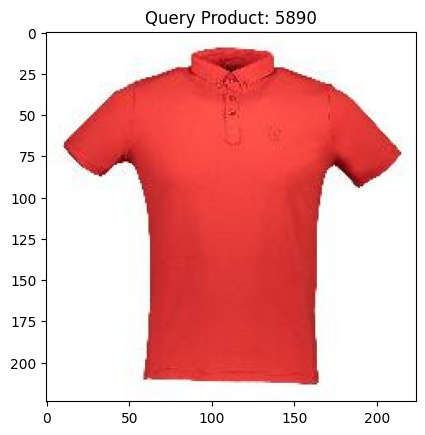

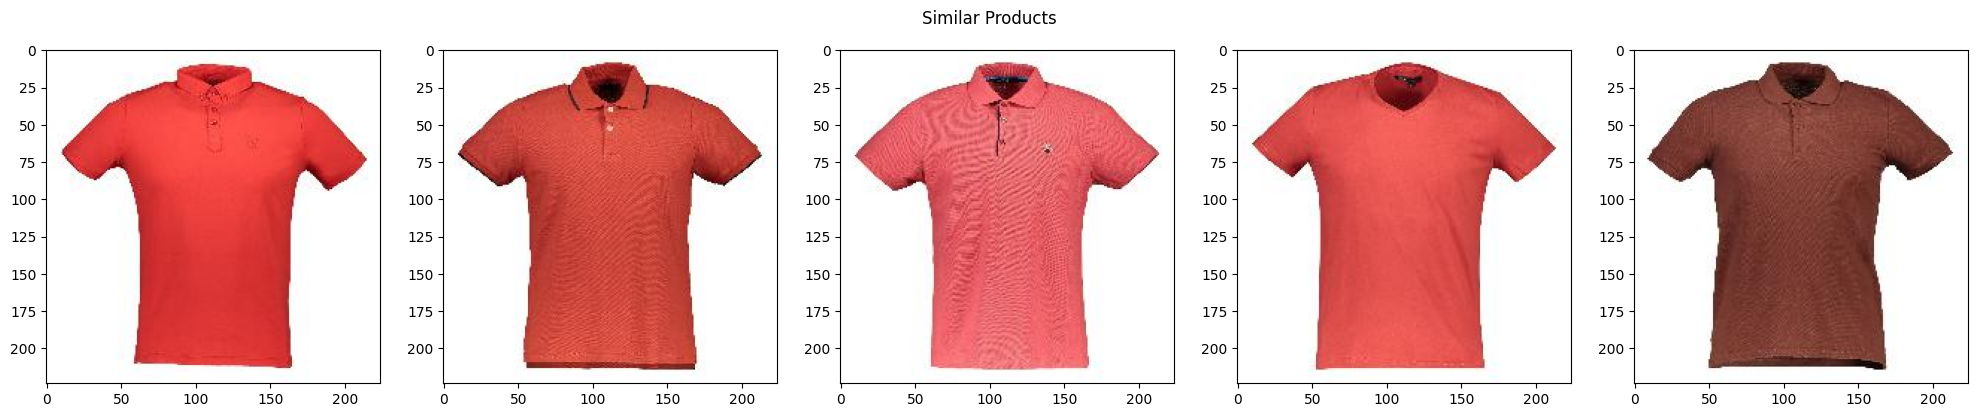

In [33]:
plot_similar(df=image_df,
             query_index=5890,
             k_neighbors=5)

nearest_indices: [1566, 46, 585, 118, 353]


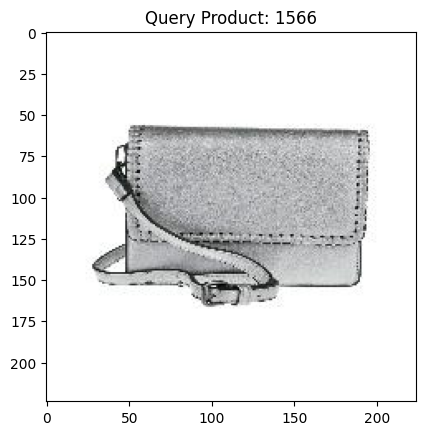

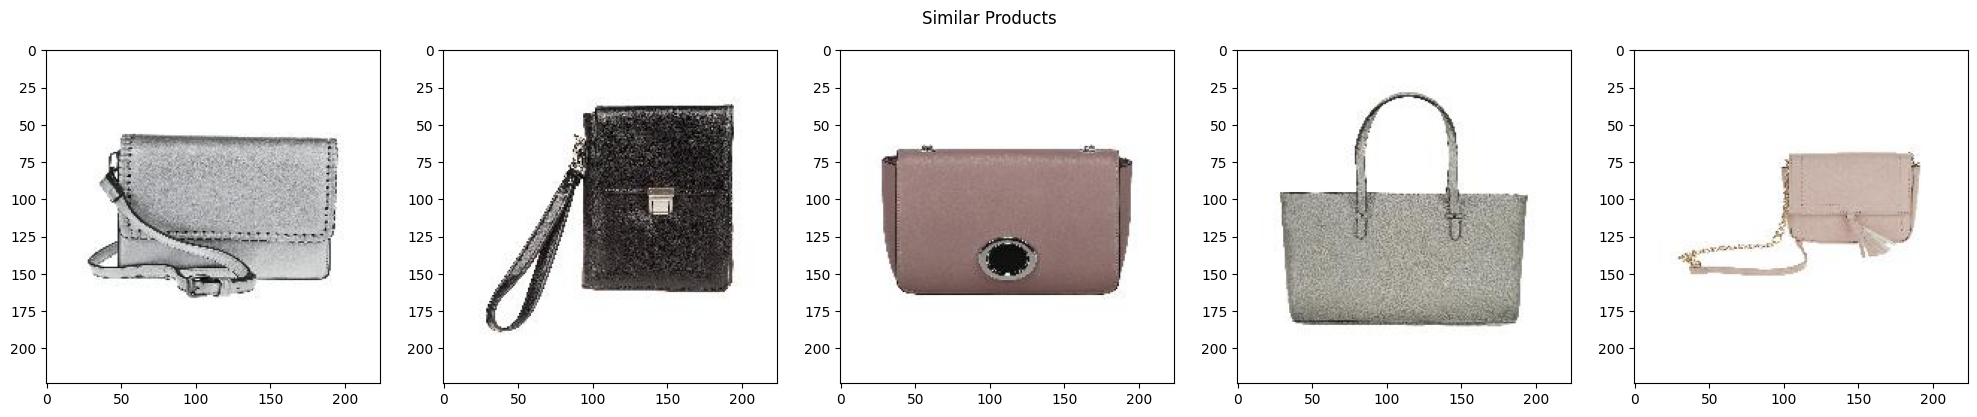

In [35]:
plot_similar(df=image_df,
             query_index=randint(0, len(embeddings)),
             k_neighbors=5)